In [1]:
import numpy as np
from matplotlib import pyplot as pl

%matplotlib inline

In [29]:
def sor(u, b, w, iters):
    ny, nx = u.shape
    for it in range(iters):
        for j in range(1, ny-1):
            for i in range(1, nx-1):
                u[j, i] = ((1 - w) * u[j, i] +
                      w * 0.25 * (u[j - 1, i] +
                                  u[j, i - 1] +
                                  u[j, i + 1] +
                                  u[j + 1, i] -
                                  b[j, i]))
                u[:, -1] = u[:, -2]
        u[-1, i] = u[-1, :] = np.sin(3/2 * np.pi * i /Lx) 
        
    return u

In [30]:
nx = ny = 5
dx = 0.5
u = np.zeros((ny, nx))
b = np.ones((ny, nx))* 0.5 * 0.25 * 0.25
Lx = (nx + 1) * dx

u[:, 0] = 0.0 #left
u[0, :] = 0.0 #bottom



u = sor(u, b, 0.9, 1)
print(u[1:-1, 1: -1])

[[-0.00703125 -0.00861328 -0.00896924]
 [-0.00861328 -0.01090723 -0.01150345]
 [-0.00896924 -0.01150345 -0.0122078 ]]


In [31]:
u = sor(u, b, 0.9, 100)

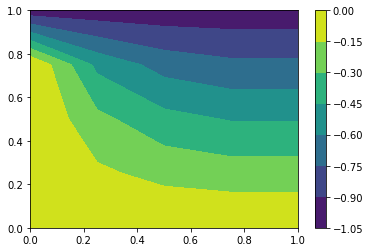

In [33]:
X, Y = np.meshgrid(np.linspace(0.0, 1.0, nx), np.linspace(0.0, 1.0, ny))
pl.contourf(X, Y, u)
pl.colorbar()